In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from scipy import ndimage


weights = "yolo-coco/t_shirt.weights"
config = "yolo-coco/yolov3-spp.cfg"
lb = "yolo-coco/t_shirt.names"
LABEL = open(lb).read().strip().split("\n")

net_yolo = cv2.dnn.readNetFromDarknet(config, weights)

def centering(img, x, y, w, h):
    res = np.zeros((h, w, 3))
    print(x + h)
    for i in range(x, x + w):
        for j in range(y, y + h):
            res[j - y][i - x] = img[j][i]/255.
    return res
    
def rotation(img, theta):
    rotated = ndimage.rotate(img, theta*180/np.pi)
    plt.imshow(rotated)
    plt.show()

211


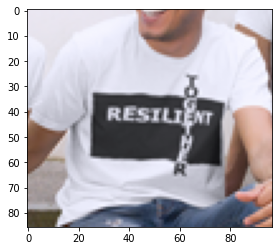

149


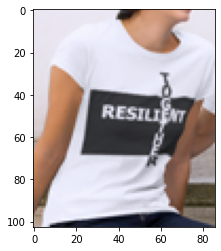

264


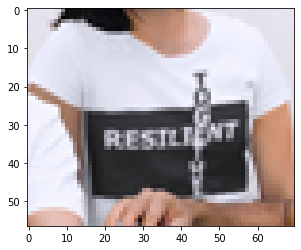

374


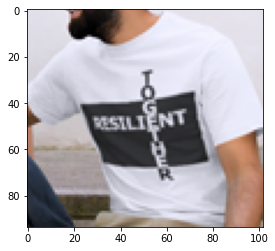

459


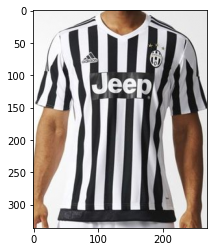

859


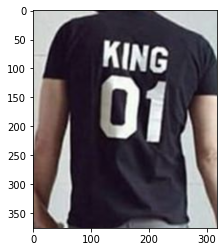

510


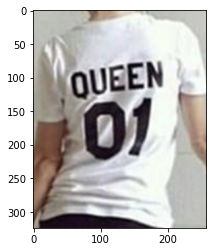

226


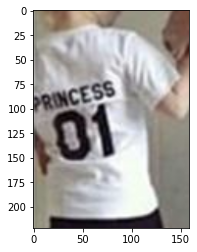

In [2]:
def zoomclass(classname, bib_val, network, LABEL, threshold=0.3, cfd=0.3):
    
    raw_val = [img for img in os.listdir(bib_val)]
    pict_val = [cv2.imread(bib_val + "/" + pict) for pict in raw_val]
    
    ln = network.getLayerNames()
    ln = [ln[i[0] - 1] for i in network.getUnconnectedOutLayers()]
    
    for img in pict_val:
        (H, W) = img.shape[:2]
        blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
        network.setInput(blob)
        layer_res = network.forward(ln)
        boxes = []
        confidences = []
        classIDs = []
        
        for output in layer_res:
                for detection in output:
                    
                    scores = detection[5:]
                    classID = np.argmax(scores)
                    
                    if LABEL[classID] == classname:
                        confidence = scores[classID]
                        if confidence > threshold:
                            box = detection[0:4]*np.array([W, H, W, H])
                            (centerX, centerY, width, height) = box.astype("int")
                            x = int(centerX - (width/2))
                            y = int(centerY - (height/2))
                            
                            boxes.append([x, y, int(width), int(height)])
                            confidences.append(float(confidence))
                            classIDs.append(classID)
        idxs = cv2.dnn.NMSBoxes(boxes, confidences, cfd, threshold)
        if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                
                if w > W:
                    w = W
                if h > H:
                    h = H
                #finally the t_shirt is displayed
                res = centering(img, x, y, w, h)
                n, m, k = res.shape

                #res is a BGR picture, we change it to RGB
                for i in range(n):
                    for j in range(m):
                        
                        RED = res[i][j][2]
                        res[i][j][2] = res[i][j][0]
                        res[i][j][0] = RED
                plt.imshow(res)
                plt.show()
zoomclass("t_shirt", "test_yolo", net_yolo, LABEL)